# Twitter Sentiment Analysis on Mask Mandate Policy in NYC
###### Author: Abdullah Altammami; Jing Gao; Nathanael George;
###### Weill Cornell Graduate School of Medical Sciences, New York, United States


## Download the required NLP models

In [ ]:
# Only needs to be run once
!pip install spacy
!python -m spacy download en_core_web_lg
!pip install en_core_web_lg

## Import the dataset

In [1]:
# You may use your own dataset in csv format
# If you have your dataset in other formats, please revise the code to import it
# properly.

import pandas as pd

data = pd.read_csv("sample_data.csv", index_col=False)
data    # Show the data

# You may also want to drop some columns or rows that you don't want after you
# import the dataset.

,text,Tag,Tag2,fav_count,ret_count,time_created
0,"I got vaxxed. I'm not gonna lie, BUT I did so ...",0.0,NaN,0.0,0.0,2022-03-26 21:14:56
1,Just keep wearing your mask. And stay home as...,0.0,NaN,0.0,0.0,2022-03-26 21:02:57
2,I’m in NYC right now and it’s pretty incredibl...,1.0,NaN,1.0,0.0,2022-03-26 20:31:28
3,"Fist time jn weeks. In NYC, relative’s condo...",1.0,NaN,1.0,0.0,2022-03-26 19:45:19
4,In NYC and masking is probably 50/50 and no on...,0.0,NaN,0.0,0.0,2022-03-26 19:44:58
...,...,...,...,...,...,...
92,"I’m vaccinated and boosted, not to much worrie...",1.0,NaN,18.0,1.0,2022-03-25 3:54:10
93,"Just a reminder that this is what ""mild"" omicr...",0.0,NaN,2.0,1.0,2022-03-25 3:34:28
94,People were still working from home last spri...,0.0,NaN,8.0,0.0,2022-03-25 3:01:22
95,NaN,NaN,NaN,NaN,NaN,NaN


## Explore the dataset

Number of Positive tweets: 49
Number of Negative tweets: 46


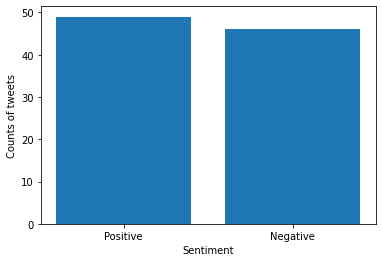

In [ ]:
# See the distribution of positive and negative tweets
import matplotlib.pyplot as plt

# The "Tag" column is the annotation that created by human annotators
# The positive tags are marked as 1 and the negatives are marked as 0

print("Number of Positive tweets: %s" % (len(data[data["Tag"]==1])))  
print("Number of Negative tweets: %s" % (len(data[data["Tag"]==0])))

sentiments = ["Positive", "Negative"]
counts = [len(data[data["Tag"]==1]), len(data[data["Tag"]==0])]

plt.bar(sentiments, counts)
plt.xlabel("Sentiment")
plt.ylabel("Counts of tweets")
plt.show()

## Create a WordCloud

In [ ]:
# Install the required wordcloud package
pip install wordcloud

In [ ]:
# Put "Positive", "Negative", and all text into different lists

positive_text = []
negative_text = []
all_text = []

for text in data["text"][data["Tag"]==1]:
  positive_text.append(text)

for text in data["text"][data["Tag"]==0]:
  negative_text.append(text)

for text in data["text"]:
  all_text.append(text)

positive = " ".join(txt for txt in positive_text)
negative = " ".join(txt for txt in negative_text)
all = " ".join(txt for txt in all_text)

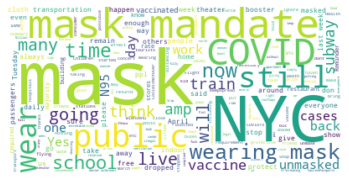

In [ ]:
# Use white background to represent the "Positive" sentiment wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc_pos = WordCloud(background_color="white").generate(positive)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

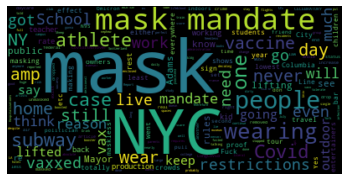

In [ ]:
# Use black background to represent the "Negative" sentiment wordcloud

wc_neg = WordCloud(background_color="black").generate(negative)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

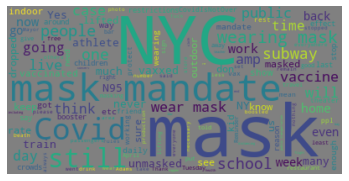

In [ ]:
# Use grey background to indicate the overall sentiment wordcloud

wc_all = WordCloud(background_color="gray").generate(all)
plt.imshow(wc_all, interpolation='bilinear')
plt.axis("off")
plt.show()

## Extract text and labels from the data

In [ ]:
# Append the text and tags into 2 list
text_list = []
labels = []
for tweet in data["text"]:
  text_list.append(tweet)
for label in data["Tag"]:
  labels.append(label)

print(len(text_list), len(labels))

95 95


In [ ]:
# import packages
import spacy
import numpy as np
import csv
from sklearn.manifold import TSNE
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import en_core_web_lg

# nlp = spacy.load('en_core_web_lg')  # load the English model
nlp = en_core_web_lg.load()

## Vectorize the text

In [ ]:
# Separate X and y for training and testing

X = np.array([nlp(sent).vector for sent in text_list])    # Potential factor for lowering the score
y = np.array([label for label in labels])

# print the dimension of x
print('X:', X.shape)

# print the dimension of y
print('y:', y.shape)

X: (95, 300)
y: (95,)


In [ ]:
print(X)
print(y)

[[-0.03047678  0.13569435 -0.13062954 ... -0.00420316  0.0081485
   0.10253704]
 [ 0.05183009  0.02958761 -0.23958232 ...  0.00110785  0.04976415
   0.01987367]
 [-0.00067493  0.1163802  -0.13037437 ... -0.04045751  0.03953254
   0.0651814 ]
 ...
 [-0.01977479  0.19942142 -0.1864948  ... -0.01866663  0.09691532
   0.11412199]
 [-0.04346573  0.18488857 -0.05792084 ...  0.00328427 -0.04234868
   0.02771248]
 [ 0.02519059  0.06925511 -0.12054227 ... -0.04062803  0.00364155
   0.0456946 ]]
[0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## PCA plot

In [ ]:
# PCA plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit the PCA model using training set
pca.fit(X)

X_pca = pca.transform(X)

print(X_pca.shape)

(95, 2)


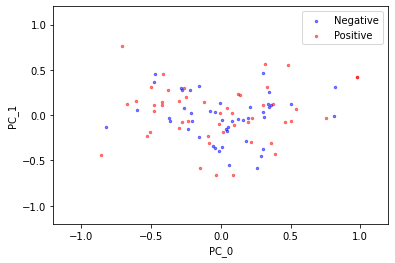

In [ ]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1],
           s = 6,
           c = "blue",
           alpha = 0.5,
           label = "Negative")

plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1],
           s = 6,
           c = "red",
           alpha = 0.5,
           label = "Positive")

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.xlabel("PC_0")
plt.ylabel("PC_1")
plt.legend()

plt.show()

## tSNE plot

In [ ]:
# Import the tSNE package
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
           init="random",
           random_state=1)

X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


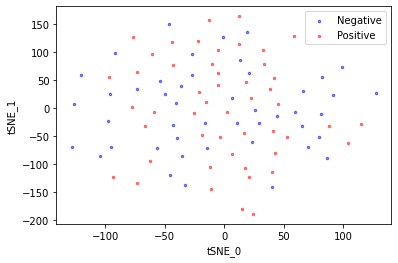

In [ ]:
# Visualize the data in tSNE graph
plt.scatter(X_tsne[y == 0, 0],
            X_tsne[y == 0, 1],
            s = 6,
            c = "blue",
            alpha = 0.5,
            label = "Negative")
plt.scatter(X_tsne[y == 1, 0],
            X_tsne[y == 1, 1],
            s = 6,
            c = "red",
            alpha = 0.5,
            label = "Positive")

plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")

plt.legend()

plt.show()

## Split the training and testing sets (80% : 20%)

In [ ]:
# Split the train and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X train:', X_train.shape)
print('y train:', y_train.shape)
print('X test:', X_test.shape)
print('y test:', y_test.shape)

X train: (76, 300)
y train: (76,)
X test: (19, 300)
y test: (19,)


## BernoulliNB model and Evaluation

In [ ]:
# Train the model

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

classifier = BernoulliNB()
classifier.fit(X_train, y_train)

cross_score_Bern = cross_val_score(classifier, X, y, cv = 5)
print(cross_score_Bern)    # The score shows that the model is underfitting (not enough data)

[0.68421053 0.42105263 0.42105263 0.52631579 0.63157895]


In [ ]:
mean_accuracy = classifier.score(X_test, y_test)
print(mean_accuracy)

0.7894736842105263


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = classifier.predict(X_test)
pre, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision: %.4f' % pre)
print('Recall:    %.4f' % recall)
print('F1:        %.4f' % f1)

Precision: 0.8889
Recall:    0.7273
F1:        0.8000


In [ ]:
y_pred

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1.])

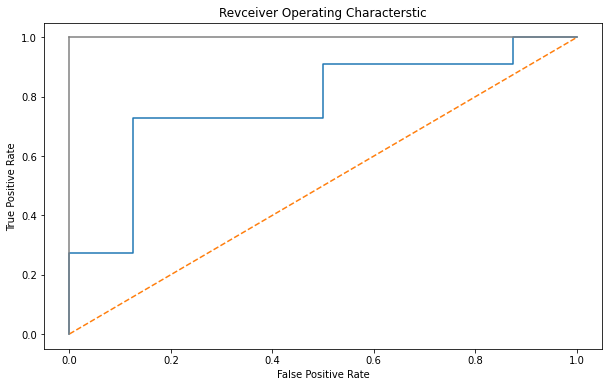

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score,roc_curve 

# make prediction on the test set 
y_proba = classifier.predict_proba(X_test)[:,1] 

#Create true and false positive rates
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_proba)

#Plot ROC Curve
plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print("Area under curve:", auc_lr)

Area under curve: 0.7727272727272726


## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=10)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=10)

In [ ]:
# the mean accuracy on the given test data and labels
clf.score(X_test, y_test)

0.5789473684210527

In [ ]:
# Calculate Precision, Recall, F1 score
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

pre, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision: %.4f' % pre)
print('Recall:    %.4f' % recall)
print('F1:        %.4f' % f1)

Precision: 0.6667
Recall:    0.5455
F1:        0.6000


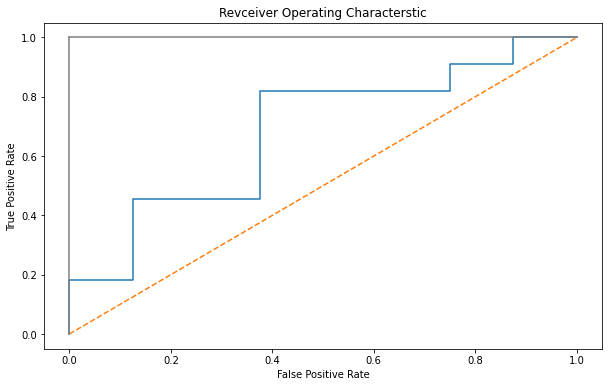

In [ ]:
# ROC curve
# make prediction on the test set 
y_proba = clf.predict_proba(X_test)[:,1] 

#Create true and false positive rates
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_proba)

#Plot ROC Curve
plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print("Area under curve:", auc_lr)

Area under curve: 0.6818181818181818


## SVC Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

cross_score_SVC = cross_val_score(clf, X, y, cv = 5)
print("cross validation score:", cross_score_SVC)

print("Accuracy of the model:", clf.score(X_test, y_test))

cross validation score: [0.52631579 0.47368421 0.52631579 0.68421053 0.52631579]
Accuracy of the model: 0.47368421052631576


In [ ]:
y_pred = clf.predict(X_test)

pre, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision: %.4f' % pre)
print('Recall:    %.4f' % recall)
print('F1:        %.4f' % f1)

Precision: 0.5556
Recall:    0.4545
F1:        0.5000


## Kmean Classifier

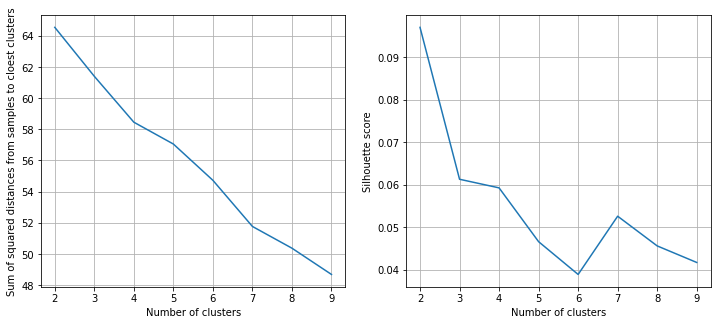

In [ ]:
# Train the Kmeans clustering model
from sklearn import metrics
from sklearn.cluster import KMeans

K=10

squared_distance = []
silhouette_score = []

for i in range(2, K):
    kmean= KMeans(i)
    kmean.fit(X_train)
    squared_distance.append(kmean.inertia_) 
    silhouette_score.append(metrics.silhouette_score(X_train,
                                                    kmean.labels_,
                                                     metric="euclidean"))

# Plot the Kmeans scores
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(range(2, K), squared_distance)
axs[1].plot(range(2, K), silhouette_score)

axs[0].grid(True) # turn the axes grids on
axs[0].set_ylabel('Sum of squared distances from samples to cloest clusters')
axs[0].set_xlabel('Number of clusters')

axs[1].grid(True) # turn the axes grids on
axs[1].set_ylabel('Silhouette score')
axs[1].set_xlabel('Number of clusters')

plt.show()

In [ ]:
# Based on the slope change, I choose 2 as the number of clusters
# Based on the turning point of the slope, I choose 5 as the number of clusters
labels = KMeans(2).fit(X_train).labels_

labels

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X_train)

y_pred = KMeans(2).fit(X_test).labels_

pre, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision: %.4f' % pre)
print('Recall:    %.4f' % recall)
print('F1:        %.4f' % f1)

Precision: 0.5294
Recall:    0.8182
F1:        0.6429


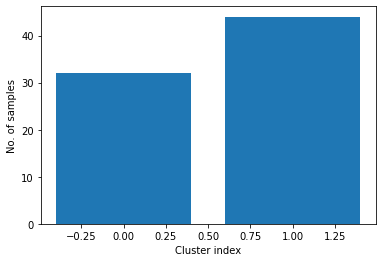

In [ ]:
# Visualize clusters
unique_labels, lanel_cnts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

plt.show()

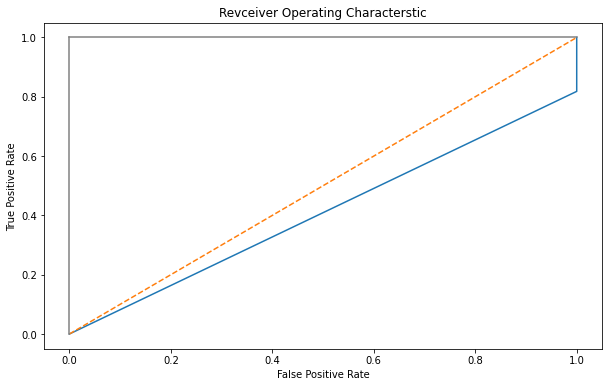

In [ ]:
# ROC curve
# make prediction on the test set 

#Create true and false positive rates
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred)

#Plot ROC Curve
plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_pred) 
print("Area under curve:", auc_lr)

Area under curve: 0.4090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


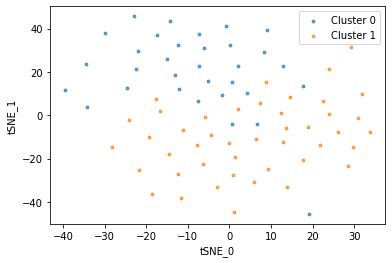

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2,
            init = "random",# random initialization, other option: PCA
            random_state = 1
           )
X_tsne = tsne.fit_transform(X_train)

# Visualize the clusters in 2D t-SNE space
for l in unique_labels: 
    plt.scatter(X_tsne[labels==l,0],X_tsne[labels==l,1],
               s = 8,
               alpha = 0.7, 
               label = "Cluster %s" % l 
                )
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # show legend

plt.show()